<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[Question 1] Understanding the content of the competition

1.Home Credit is a financial institution that aims to provide loans to people who have insufficient or no credit histories, in order to broaden financial inclusion for the unbanked population.

2.In this competition, Home Credit is challenging Kagglers (participants in a data science competition hosted on the Kaggle platform) to use their expertise to unlock the full potential of the company's data. Specifically, Kagglers are expected to develop machine learning models that can predict clients' repayment abilities using a variety of alternative data, including telco and transactional information. The goal is to ensure that Home Credit is able to lend to clients who are capable of repayment, while minimizing the risk of default.

3.Home Credit can benefit in several ways from predicting their clients' repayment abilities. By accurately assessing a client's creditworthiness, Home Credit can reduce the risk of default and minimize losses. Additionally, by providing loans to clients who are capable of repayment, Home Credit can expand its customer base and increase revenue. Finally, by using alternative data sources, Home Credit can provide loans to people who might not otherwise have access to credit, thereby helping to broaden financial inclusion.

[Problem 2] Understanding the overview of the data

In [25]:
import pandas as pd
train= pd.read_csv("application_train.csv")
print(train.info())
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 12.6+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13569,115813,0,Cash loans,M,Y,Y,2,157500.0,1428295.5,72684.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13570,115814,0,Cash loans,F,Y,Y,1,54000.0,67500.0,7218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13571,115815,0,Cash loans,M,Y,N,0,225000.0,270000.0,16443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13572,115816,0,Cash loans,M,Y,Y,0,112500.0,125640.0,6543.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
missing_values = train
print(missing_values)
print(missing_values.isnull())
     

       SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0          100002       1         Cash loans           M            N   
1          100003       0         Cash loans           F            N   
2          100004       0    Revolving loans           M            Y   
3          100006       0         Cash loans           F            N   
4          100007       0         Cash loans           M            N   
...           ...     ...                ...         ...          ...   
13569      115813       0         Cash loans           M            Y   
13570      115814       0         Cash loans           F            Y   
13571      115815       0         Cash loans           M            Y   
13572      115816       0         Cash loans           M            Y   
13573      115817       0         Cash loans           M            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   Y             0          202500.0 

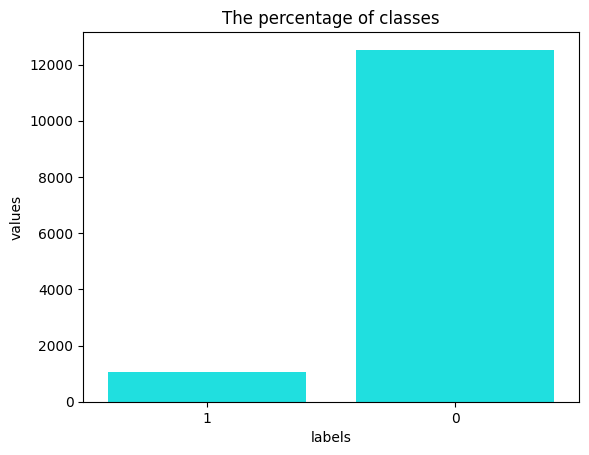

In [27]:

temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
plt.title('The percentage of classes')
sns.barplot(x = 'labels', y="values", data=df, order = [1,0], color='cyan')
plt.show()


Problem 3] Defining issues

1.Dataset is an unbalanced

2.Almost half of feature has missing values about 50 percent

3.Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment, with academic the lowest.


[Problem 4] Data exploration

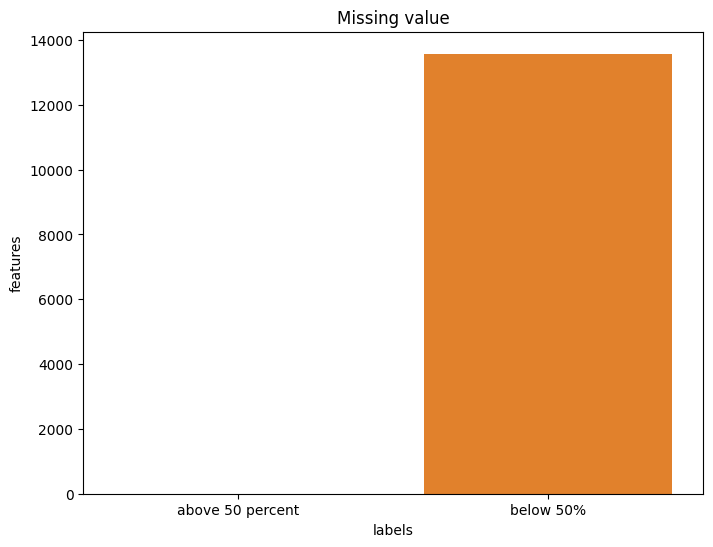

In [30]:
j = 0
for i in range(len(missing_values)):
    if missing_values.iloc[i, 1] > 50:
        j = j + 1

df = pd.DataFrame({'labels': ['above 50 percent', 'below 50%'],
                   'features': [j, len(missing_values) - j]
                  })

plt.figure(figsize=(8, 6))
plt.title('Missing value')
sns.barplot(x='labels', y="features", data=df)
plt.show()

def plot_stats(feature, horizontal=True, order=None):
    plt.figure(figsize=(10, 5))
    if horizontal:
        plt.subplot(121)
        sns.countplot(y=feature, data=train, order=order)
    else:
        plt.subplot(121)
        sns.countplot(x=feature, data=train, order=order)

    plt.subplot(122)
    if horizontal:
        sns.barplot(y=feature, x='TARGET', data=train, order=order)

    plt.tight_layout()
    plt.show()

def plot_distribution(feature, color):
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(), kde=True, color=color)
    plt.show()


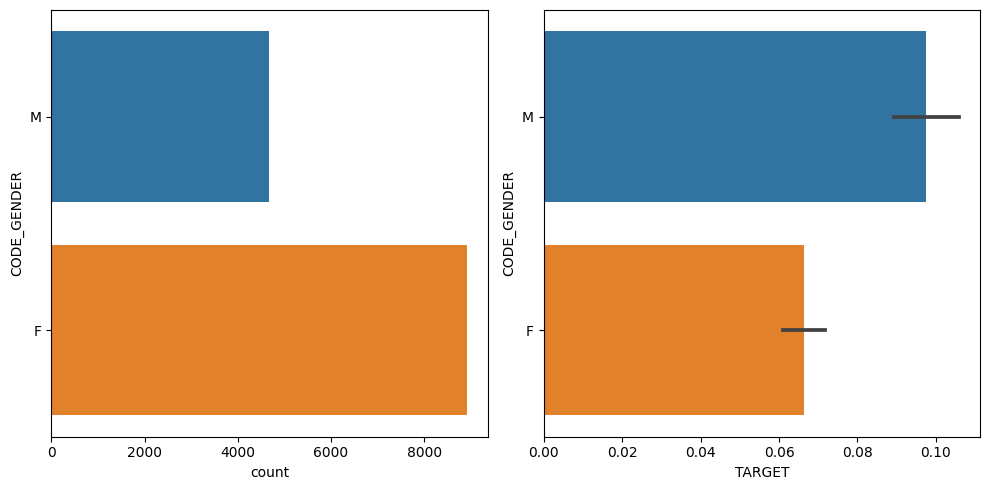

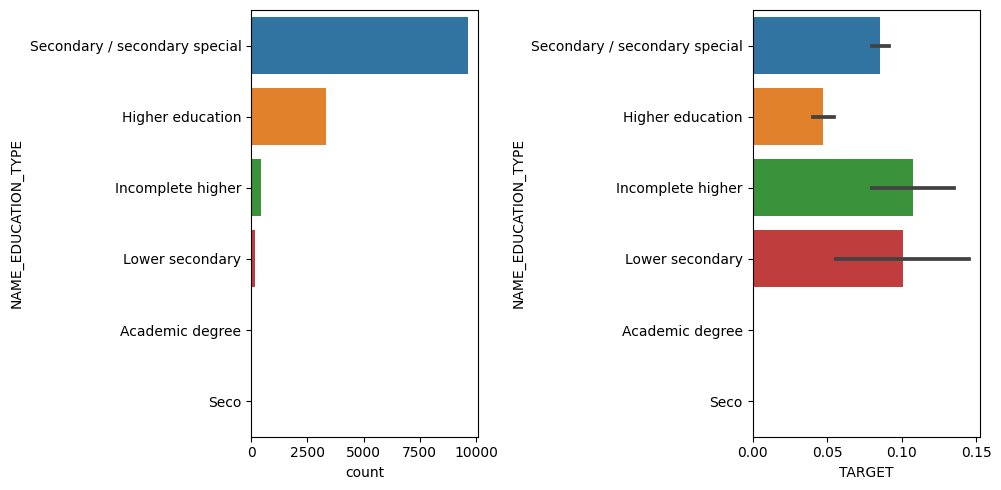

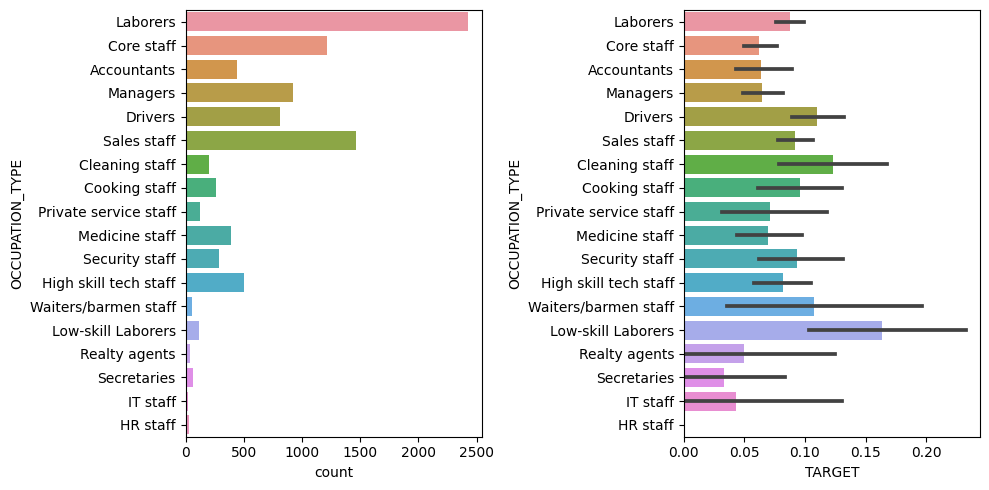

TypeError: ignored

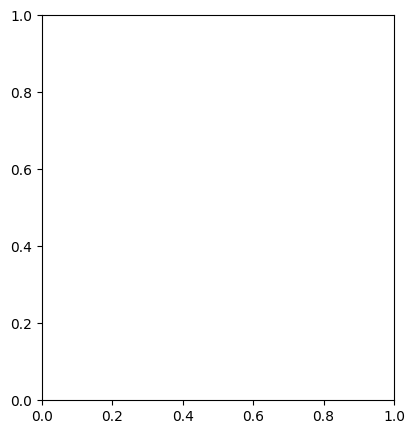

In [33]:
plot_stats('CODE_GENDER')
plot_stats('NAME_EDUCATION_TYPE')
plot_stats('OCCUPATION_TYPE')
plot_stats('NAME_INCOME_TYPE',False,False)
plot_distribution('AMT_ANNUITY', 'red')